<a href="https://colab.research.google.com/github/kmouleejunhyuk/bigdata_analysist_practical/blob/main/type2_analysing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#prepare data
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
#@title  { display-mode: "both" }
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild() 

In [ ]:
#@title
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
#@title
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild() 

In [2]:
PATH ='/gdrive/MyDrive/big_2021/data/official'
SEED = 49

data leakeage 고치기

In [3]:
import pandas as pd
import numpy as np
import collections
import sklearn

In [4]:
x_test_o = pd.read_csv(PATH + '/type2/X_test.csv', encoding = 'cp949')
x_train_o = pd.read_csv(PATH + '/type2/X_train.csv', encoding = 'cp949')
y_train_o = pd.read_csv(PATH + '/type2/y_train.csv', encoding = 'cp949')

In [5]:
x_test_raw = x_test_o.copy()
x_train_raw = x_train_o.copy()
y_train_raw = y_train_o.copy()

In [6]:
x_train_raw.shape

(3500, 10)

In [7]:
y_train_raw.shape

(3500, 2)

In [8]:
x_test_raw.shape

(2482, 10)

In [9]:
x_test_raw.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3
3,3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47
4,3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8


In [10]:
x_train_raw.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [11]:
y_train_raw.head()

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


주구매지점 인코딩

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train_raw['주구매지점'] = le.fit_transform(x_train_raw['주구매지점'])
x_test_raw['주구매지점'] = le.transform(x_test_raw['주구매지점'])

x_train_raw['주구매지점'].value_counts()

8     1077
19     474
11     436
9      245
15     241
18     198
0      145
2      114
3       90
22      86
5       70
7       69
10      57
6       49
1       46
17      34
14      29
23      11
4        7
16       6
13       6
20       5
21       4
12       1
Name: 주구매지점, dtype: int64

이상치 및 중복값 제거를 용이하게 하기 위해 레이블과 변수 통합

In [13]:
x_train_raw = pd.concat([y_train_raw['gender'], x_train_raw], axis = 1)

In [14]:
x_train_raw.head()

,gender,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,0,19,3.894737,0.527027,17
1,0,1,2136000,2136000,300000.0,스포츠,19,2,1.500000,0.000000,1
2,1,2,3197000,1639000,NaN,남성 캐주얼,1,2,2.000000,0.000000,1
3,1,3,16077620,4935000,NaN,기타,2,18,2.444444,0.318182,16
4,0,4,29050000,24000000,NaN,보석,8,2,1.500000,0.000000,85


#EDA

In [15]:
x_train_raw['gender'].value_counts()

0    2184
1    1316
Name: gender, dtype: int64

여자가 남자보다 약 2배 많은 데이터, 하지만 과적합하기엔 표본이 많다(레이블 불균형 고려 x)

null과 duplicated 데이터를 확인한다

In [16]:
x_train_raw.isnull().sum()

gender        0
cust_id       0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [17]:
x_test_raw.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [18]:
x_train_raw.duplicated().sum()

0

x의 환불금액에 null이 있다. 고객 별 환불금액이니 환불 이력이 없다는 의미. 0으로 치환한다.


In [19]:
x_train_raw['환불금액'].replace(np.nan, 0, inplace = True)
x_train_raw.isnull().sum()

gender     0
cust_id    0
총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
dtype: int64

In [20]:
x_test_raw['환불금액'].replace(np.nan, 0, inplace = True)
x_test_raw.isnull().sum()

cust_id    0
총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
dtype: int64


cust_id를 제외한 레이블 별 데이터의 분포를 살펴본다

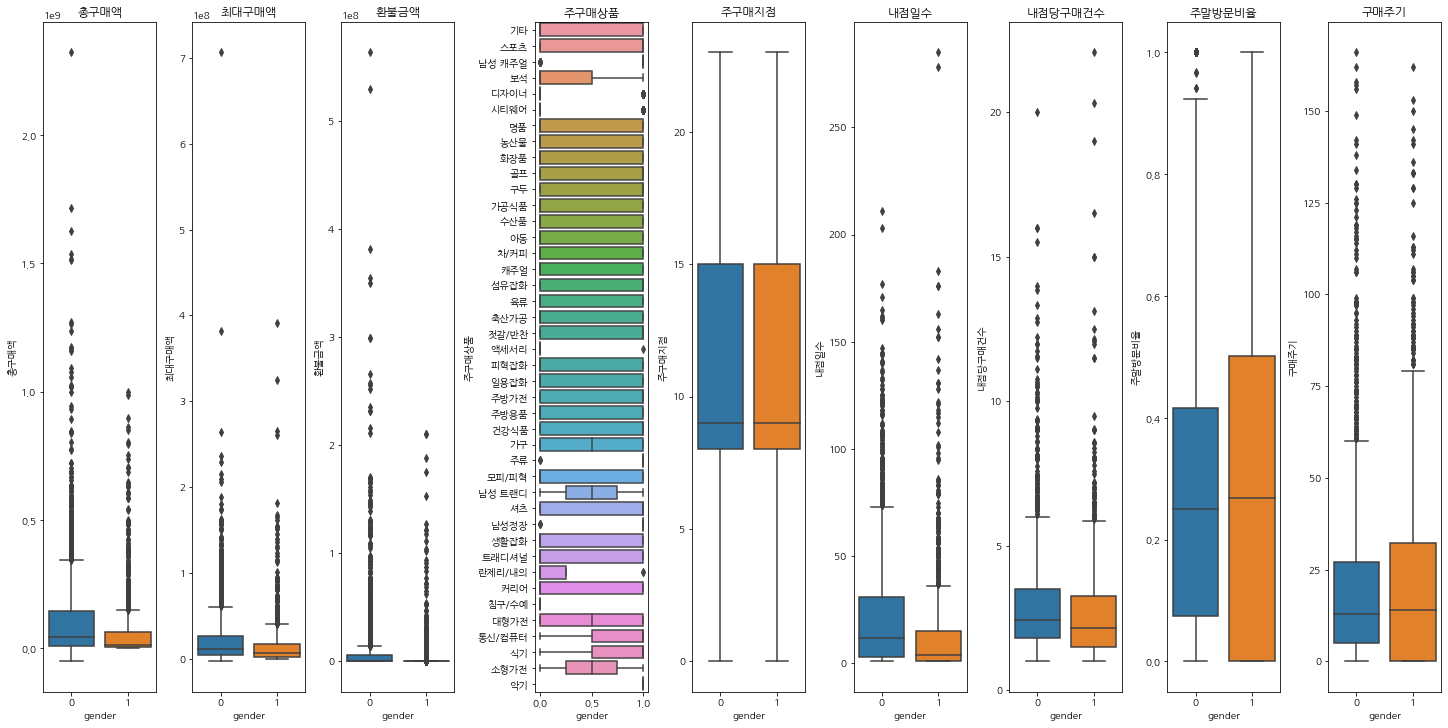

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
c = list(x_train_raw.columns)
c.remove('cust_id')
tmp = x_train_raw[c]
fig, axes = plt.subplots(ncols = len(x_train_raw.columns) - 2, figsize = (20, 10), constrained_layout=True)
c.remove('gender')
for i, col in enumerate(c):
    if col not in ['gender']:
        axes[i].set_title(col)
        sns.boxplot(x= 'gender', y = col, data = x_train_raw, ax = axes[i])

총 구매금액이 음수인 사용자는 제거

In [22]:
invalid_index = x_train_raw['총구매액'] < 0
x_train_raw = x_train_raw[~invalid_index]

In [23]:
x_train_raw.describe()

,gender,cust_id,총구매액,최대구매액,환불금액,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
count,3497.000000,3497.00000,3.497000e+03,3.497000e+03,3.497000e+03,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000
mean,0.376323,1748.62139,9.201936e+07,1.965454e+07,8.116796e+06,10.736345,19.255934,2.835534,0.307344,20.968544
std,0.484532,1010.22432,1.635398e+08,3.198607e+07,2.875541e+07,5.638441,27.184112,1.912509,0.289827,24.756044
min,0.000000,0.00000,0.000000e+00,5.000000e+03,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,874.00000,4.770000e+06,2.875000e+06,0.000000e+00,8.000000,2.000000,1.666667,0.027778,4.000000
50%,0.000000,1749.00000,2.827300e+07,9.834000e+06,0.000000e+00,9.000000,8.000000,2.333333,0.256410,13.000000
75%,1.000000,2623.00000,1.068040e+08,2.295000e+07,2.576000e+06,15.000000,25.000000,3.375000,0.448980,28.000000
max,1.000000,3499.00000,2.323180e+09,7.066290e+08,5.637530e+08,23.000000,285.000000,22.083333,1.000000,166.000000


파생변수 생성


In [27]:
x_train_raw['최초구매액'] = x_train_raw['총구매액'] + x_train_raw['환불금액'] + 1
x_train_raw['최대구매액비율'] = x_train_raw['최대구매액']/x_train_raw['최초구매액']
x_train_raw['환불금액비율'] = x_train_raw['환불금액']/x_train_raw['최초구매액']
x_train_raw['총구매건수'] = x_train_raw['내점일수']*x_train_raw['내점당구매건수']

likely_man = ['악기', '대형가전', '식기', '남성캐쥬얼', '주류', '남성정장']
likely_woman = ['보석', '디자이너', '시티웨어', '엑세서리', '침구/수예']

x_train_raw['likely_man'] = [1 if x in likely_man else 0 for x in x_train_raw['주구매상품']]
x_train_raw['likely_woman'] = [1 if x in likely_woman else 0 for x in x_train_raw['주구매상품']]

상관계수 확인

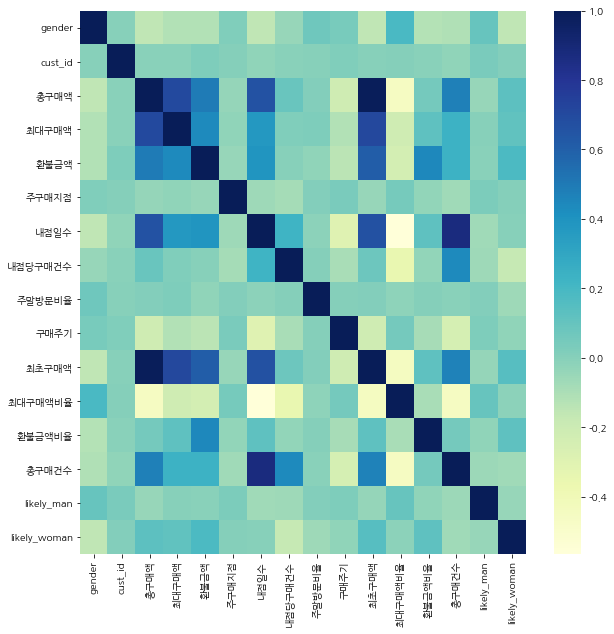

In [28]:
_, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(x_train_raw.corr(), cmap="YlGnBu")

In [29]:
temp = x_train_raw.iloc[:,2:]
numerical_cols = [cname for cname in temp.columns if temp[cname].dtype in ['int64', 'float64']]
object_cols = [cname for cname in temp.columns if temp[cname].dtype == "object"]

총구매액


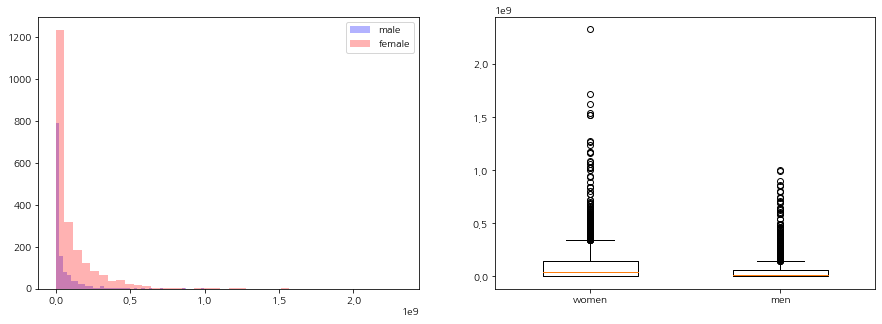

최대구매액


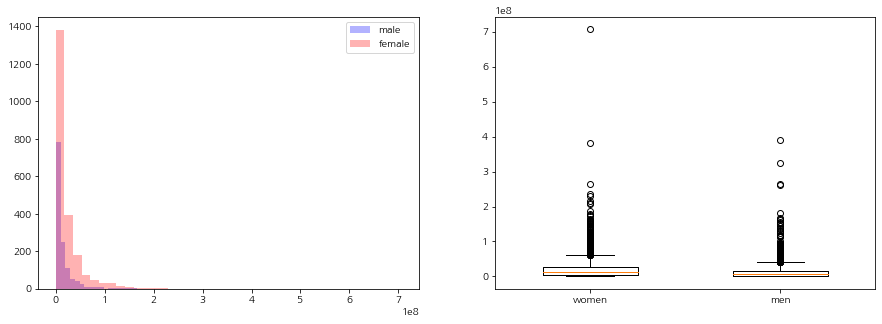

환불금액


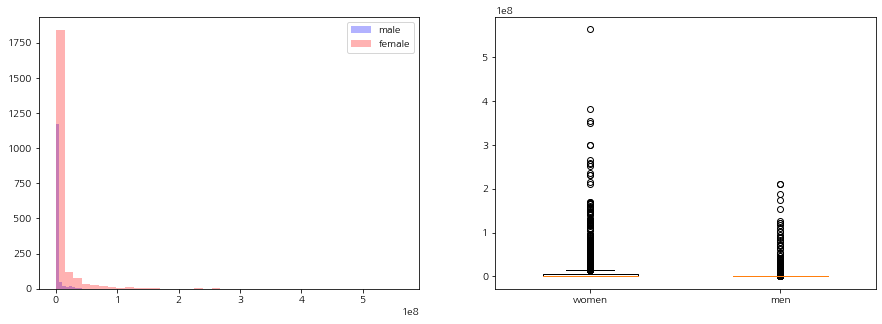

주구매지점


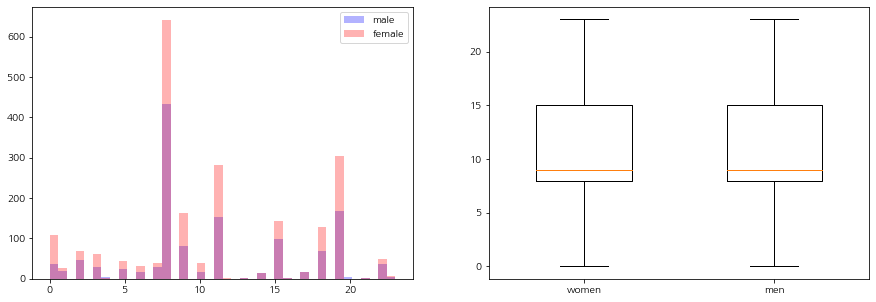

내점일수


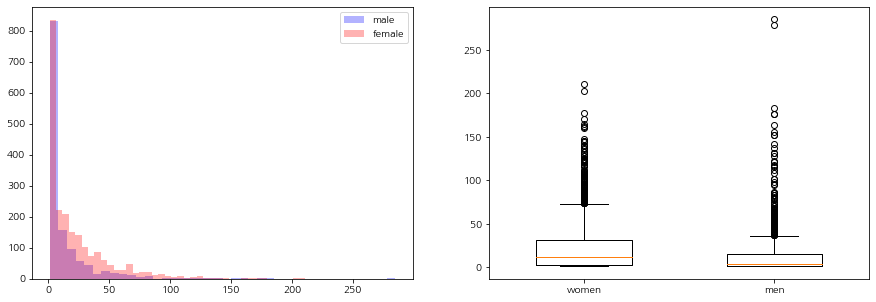

내점당구매건수


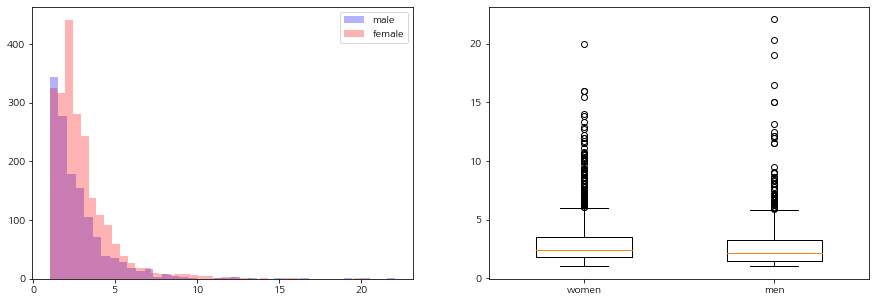

주말방문비율


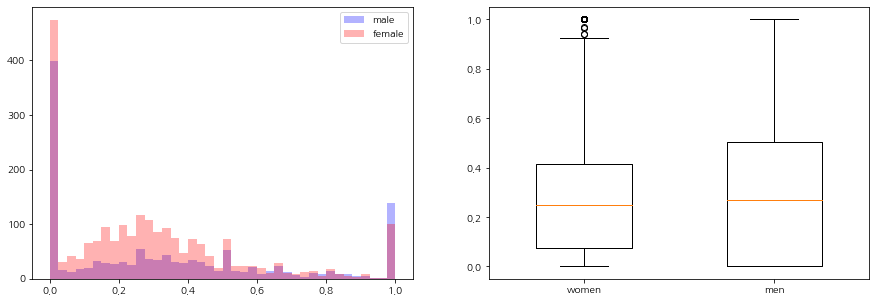

구매주기


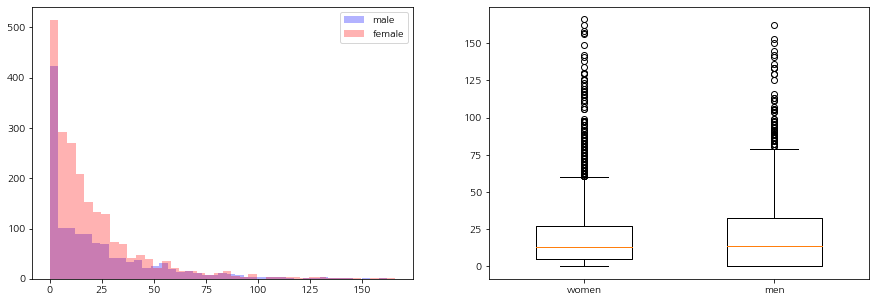

최초구매액


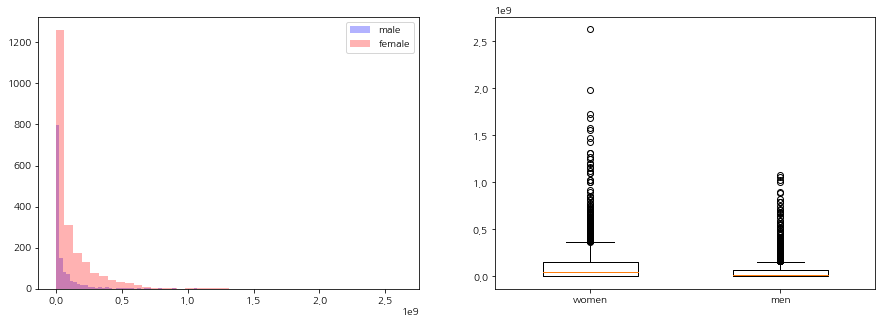

최대구매액비율


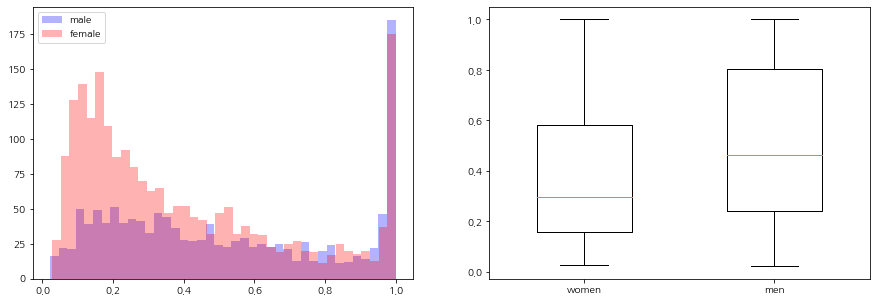

환불금액비율


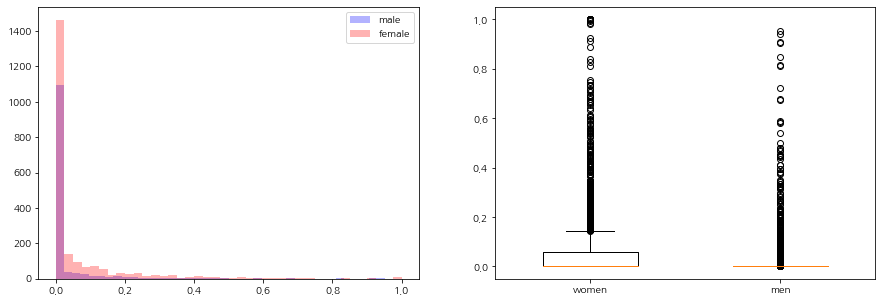

총구매건수


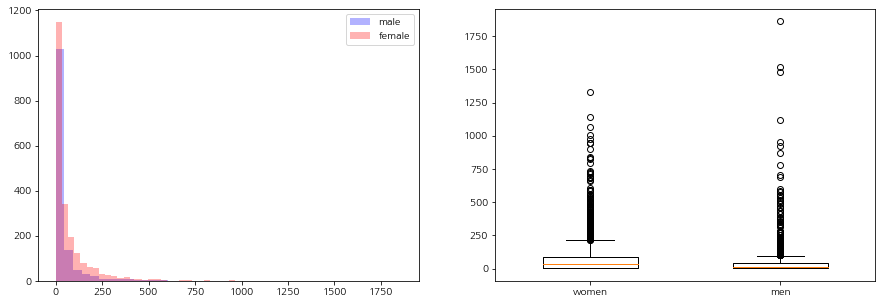

likely_man


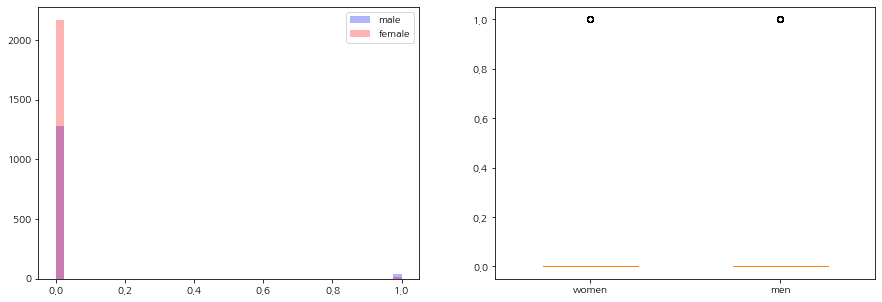

likely_woman


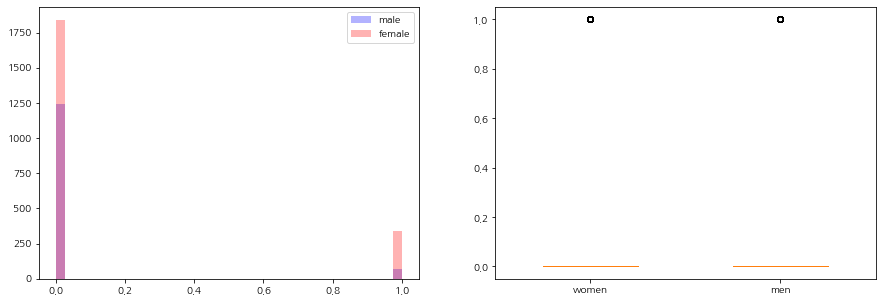

In [30]:
for col in numerical_cols:
    df = x_train_raw[[col,'gender']]
    
    male = df[df.gender==1]
    female = df[df.gender==0]
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    
    print(col)
    axes[0].hist(male[col],alpha=0.3,color='blue',label='male',bins=40)
    axes[0].hist(female[col],alpha=0.3,color='red',label='female',bins=40)
    axes[0].legend()
    axes[1].boxplot(female[col],positions=[0],widths=0.5)
    axes[1].boxplot(male[col],positions=[1],widths=0.5)
    axes[1].set_xticklabels(['women','men'])
    plt.show()

In [31]:
x_train_raw['주구매상품'].value_counts()

기타        594
가공식품      546
농산물       339
화장품       264
시티웨어      213
디자이너      191
수산품       153
캐주얼       101
명품        100
섬유잡화       98
골프         82
스포츠        69
일용잡화       64
모피/피혁      57
육류         57
남성 캐주얼     55
구두         54
건강식품       47
차/커피       44
피혁잡화       40
아동         40
축산가공       35
주방용품       32
셔츠         30
젓갈/반찬      29
주방가전       26
트래디셔널      23
남성정장       22
생활잡화       15
주류         14
가구         10
커리어         9
대형가전        8
란제리/내의      8
식기          7
액세서리        5
침구/수예       4
보석          3
통신/컴퓨터      3
악기          2
남성 트랜디      2
소형가전        2
Name: 주구매상품, dtype: int64

In [32]:
x_train_raw['주구매지점'].value_counts()

8     1075
19     474
11     436
9      244
15     241
18     198
0      145
2      114
3       90
22      86
5       70
7       69
10      57
6       49
1       46
17      34
14      29
23      11
4        7
16       6
13       6
20       5
21       4
12       1
Name: 주구매지점, dtype: int64

In [33]:
x_train_raw.drop(labels = ['주구매지점'], axis = 1, inplace = True)

In [34]:
d = pd.get_dummies(x_train_raw['주구매상품'])
x_train = pd.concat([x_train_raw, d], axis = 1).copy()

In [35]:
y_train = x_train['gender']
x_train.drop(['gender','주구매상품', 'cust_id'], axis = 1, inplace = True)
x_train

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,최초구매액,최대구매액비율,환불금액비율,총구매건수,likely_man,likely_woman,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,대형가전,디자이너,란제리/내의,명품,모피/피혁,보석,생활잡화,섬유잡화,셔츠,소형가전,수산품,스포츠,시티웨어,식기,아동,악기,액세서리,육류,일용잡화,젓갈/반찬,주류,주방가전,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
0,68282840,11264000,6860000.0,19,3.894737,0.527027,17,75142841.0,0.149901,0.091293,74.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2136000,2136000,300000.0,2,1.500000,0.000000,1,2436001.0,0.876847,0.123153,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3197000,1639000,0.0,2,2.000000,0.000000,1,3197001.0,0.512668,0.000000,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16077620,4935000,0.0,18,2.444444,0.318182,16,16077621.0,0.306948,0.000000,44.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,29050000,24000000,0.0,2,1.500000,0.000000,85,29050001.0,0.826162,0.000000,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,0.0,1,2.000000,1.000000,0,3175201.0,0.958333,0.000000,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3496,29628600,7200000,6049600.0,8,1.625000,0.461538,40,35678201.0,0.201804,0.169560,13.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3497,75000,75000,0.0,1,1.000000,0.000000,0,75001.0,0.999987,0.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3498,1875000,1000000,0.0,2,1.000000,0.000000,39,1875001.0,0.533333,0.000000,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


holdout

In [36]:
from sklearn.model_selection import train_test_split

x = x_train.copy()
y = y_train.copy()

x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(x, y, random_state = SEED, test_size = 0.1, stratify = y)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(3147, 55) (350, 55) (3147,) (350,)


In [37]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_valid = std.transform(x_valid)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
temp_pca_train = pca.fit_transform(x_train)

In [58]:
pca.explained_variance_ratio_

array([0.08309317, 0.04386214, 0.03668745])

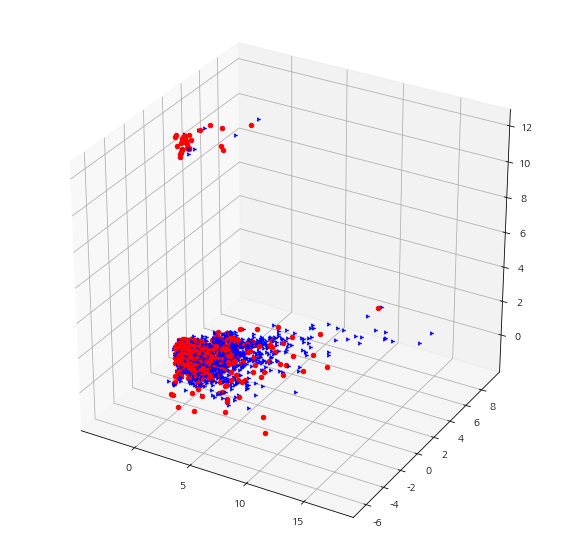

In [39]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
ax = plt.subplot(1,1,1, projection = '3d')
plt.xlim(temp_pca_train[:, 0].min() - 1, temp_pca_train[:, 0].max() + 1)
plt.ylim(temp_pca_train[:, 1].min() - 1, temp_pca_train[:, 1].max() + 1)

#ax.scatter3D(temp_pca_train[:, 0], temp_pca_train[:, 1], temp_pca_train[:, 2])
#ax.view_init(elev=10, azim=0)
for i in range(temp_pca_train.shape[0]):
    if y_train.values[i] == 1: 
        ax.scatter3D(temp_pca_train[i, 0], temp_pca_train[i, 1], temp_pca_train[i, 2], c= 'r', marker = 'o')
    else:
        ax.scatter3D(temp_pca_train[i, 0], temp_pca_train[i, 1], temp_pca_train[i, 2], c = 'b', marker = '4')
    

pca-이상치 제거


In [40]:
temp_pca_train_df = pd.DataFrame(temp_pca_train, columns = ['c1', 'c2', 'c3'])
idx = temp_pca_train_df.loc[temp_pca_train_df.c3 >= 6, :].index

In [41]:
x_train = np.delete(x_train, idx, axis = 0)

In [42]:
y_train = np.delete(y_train.values, idx, axis = 0)

knn classifier, 신경망, 랜덤 포레스트, SVM 

데이터 분할

knn classifier

이웃 수 그리드 서칭

In [44]:
from xgboost import XGBRegressor

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [55]:
param_svc = [{'model': [SVC()], 
              'model__gamma': [0.01, 0.1, 1, 10, 100], 
              'model__C': [0.01, 0.1, 1, 10, 100]
              }]

param_xgb =[{'model': [XGBClassifier()], 
             'model__learning_rate' : [0.1, 0.3, 0.5],
             'model__n_estimators' : [50, 100, 200,],  
             'model__max_depth': [3, 4, 6]
             }]

param_rf = [{'model': [RandomForestClassifier()],
             'model__max_depth': [3, 4, 6], 
             'model__n_estimators': [50, 100, 200], 
             'model__min_samples_split': [50, 100]
             }]        

params = {'svc': [SVC(), param_svc], 'xgb': [XGBClassifier(), param_xgb], 'rf': [RandomForestClassifier(), param_rf]}

for name in ['svc', 'xgb', 'rf']:
    param_ = params[name][1]
    model = params[name][0]
    pipe = Pipeline([('model', model)])
    grid = GridSearchCV(pipe, param_, scoring = 'roc_auc', cv=5)  
    grid.fit(x_train, y_train)

    print(grid.best_params_)
    print(grid.best_score_)

{'model': SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'model__C': 0.1, 'model__gamma': 0.01}
0.6402411826847547
{'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
0.664850819339288
{'model': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

stacking ensemble(svm, logistic, randomforest, neuralnet, xgboost) -->lgbm

In [46]:
svc = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc.fit(x_train, y_train)

rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False).fit(x_train, y_train)
rf.fit(x_train, y_train)

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1).fit(x_train, y_train)
xgb.fit(x_train, y_train)





XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
stack_svc = pd.DataFrame(svc.predict(x_train), columns = ['svc'])
stack_rf = pd.DataFrame(rf.predict(x_train), columns = ['rf'])
stack_xgb = pd.DataFrame(xgb.predict(x_train), columns = ['xgb'])

stack = pd.concat([stack_svc, stack_rf, stack_xgb], axis = 1)

In [48]:
lgbm_wrapper = lgb.LGBMClassifier(n_estimators=400)
lgbm_wrapper.fit(stack.values, y_train,  verbose=True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [49]:
stack_svc = pd.DataFrame(svc.predict(x_valid), columns = ['svc'])
stack_rf = pd.DataFrame(rf.predict(x_valid), columns = ['rf'])
stack_xgb = pd.DataFrame(xgb.predict(x_valid), columns = ['xgb'])

stack = pd.concat([stack_svc, stack_rf, stack_xgb], axis = 1)
y_hat = lgbm_wrapper.predict(stack.values)
roc_auc_score(y_hat, y_valid)

0.6121719545632589

In [50]:
lgbm_wrapper = lgb.LGBMClassifier(n_estimators=400)
lgbm_wrapper.fit(x_train, y_train,  verbose=True)
lgbm_wrapper.score(x_valid, y_valid)

0.6771428571428572

모델 평가(AUC, F1...)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid, mlp.predict(x_valid))

0.6176662320730117

다항회귀

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly_features.fit_transform(x_train)

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_hat = model.predict(poly_features.transform(x_valid))
roc_auc_score(y_valid, y_hat)

0.5211982207395052